# Transforma de NETCDF para GEOTIF

In [1]:
# instala biblioteca Rioxarray
!pip install -q rioxarray

# importa biblioteca
import xarray as xr
import rioxarray as rio
import warnings
warnings.filterwarnings("ignore")

# url DO ftp do CPTEC
url = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

# nome do arquivo
file = 'MERGE_CPTEC_acum_dec_2023'

# baixo o arquivo NETCDF
!wget {url}{file}.nc

# leitura do arquivo NETCDF
nc_file = xr.open_dataset(f'/content/MERGE_CPTEC_acum_dec_2023.nc')

# extração da variável de interesse
precip = nc_file['pacum']

# deixa apenas a matriz 2D
precip = precip[0,:,:]

# dimensões
precip = precip.rio.set_spatial_dims(x_dim='lon', y_dim='lat')
precip.rio.crs

# define a projeção CRS
precip.rio.write_crs('epsg: 4326', inplace=True)

# salva arquivo
precip.rio.to_raster(f'{file}.tiff')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 754.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.6 MB/s eta 0:00:00
--2024-04-11 22:20:41--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/MERGE_CPTEC_acum_dec_2023.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3064112 (2.9M) [application/x-netcdf]
Saving to: ‘MERGE_CPTEC_acum_dec_2023.nc’

MERGE_CPTEC_acum_de 100%[===================>]   2.92M  2.22MB/s    in 1.3s    

2024-04-11 22:20:43 (2.22 MB/s) - ‘MERGE_CPTEC_acum_dec_2023.nc’ saved [3064112/3064112]



# Plota a figura GEOTIF

In [1]:
# Instalando o rasterio
!pip install -q rasterio
!pip install -q pyproj

# Instalando matplotlib, proplot e numpy
!pip install -q matplotlib==3.4.3
!pip install -q proplot==0.9.7
!pip install -q numpy==1.24.3

# Instalando salem
!pip install -q salem==0.3.9

# Instalando cartopy
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Successfully uninstalled shapely-2.0.3


- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da disciplina.

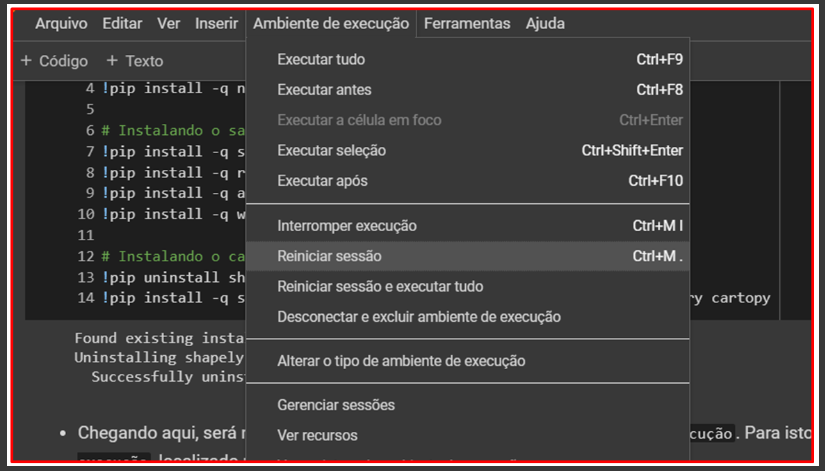

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


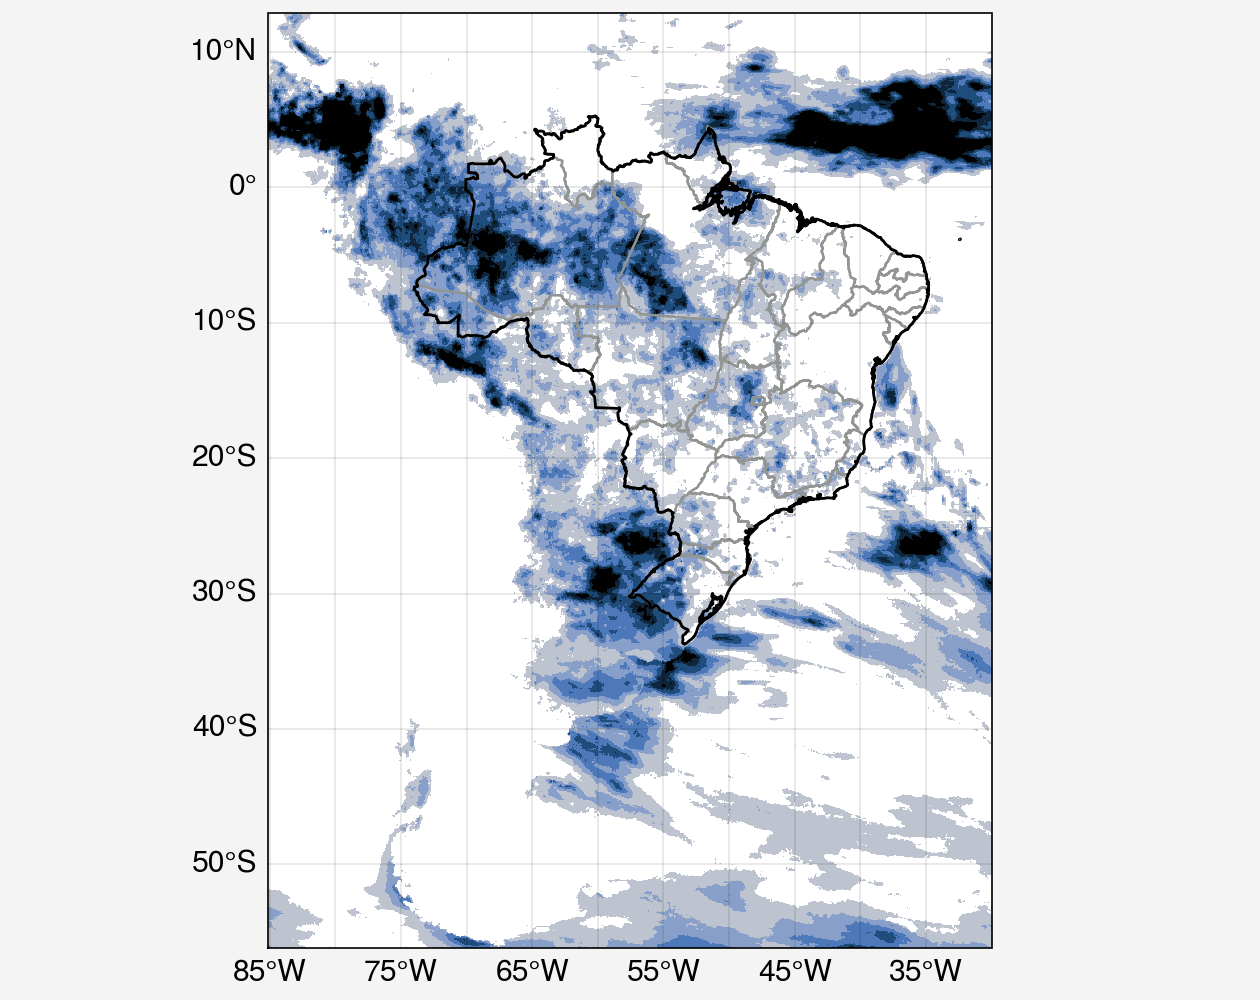

In [2]:
#========================================================================================================================#
#                                      LEITURA DO ARQUIVO GEOTIF
#========================================================================================================================#

# Abrindo arquivo tif. É bom abrir com with pq garante que o arquivo vai ser fechado
# Após a identação. Pode abrir diretamente com tif = rio.open('arq.tif')

import rasterio as rio # Biblioteca para trabalhar com arquivos raster
import proplot as pplt
import salem
import warnings
warnings.filterwarnings("ignore")

with rio.open(f'/content/MERGE_CPTEC_acum_dec_2023.tiff') as tif:

    # Limites da imagem
    lonmin, latmin, lonmax, latmax = tif.bounds

    # Informações do arquivo no formato de dicionario dê um print(meta) para ver mais coisas
    meta = tif.meta

    # Resolução do arquivo
    res = tif.res

    #data = tif.indexes
    # Lê a matriz
    data = tif.read(1)

#========================================================================================================================#
#                                          PLOTA FIGURA
#========================================================================================================================#
# moldura da figura
fig, ax = pplt.subplots(figsize=(6.3, 5), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=10, lonlines=5,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          small='15px',
          large='15px')

# plota figura
map1 = ax.imshow(data,
                 cmap='oslo_r',
                 vmin=50, vmax=400,
                 levels=pplt.arange(50, 400, 50),
                 extent=[lonmin, lonmax, latmin, latmax])

# plota contorno dos Estados
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
estados_brasil.plot(edgecolor='gray', facecolor='none', linewidth=0.8, alpha=1, ax=ax)

# plota contorno do Brasil
contorno_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')
contorno_brasil.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax)

# salvar a figura
fig.save('MERGE_CPTEC_acum_dec_2023.jpeg', dpi=300)